# Phase transformations and reduction (Blakely, 1996)

### This notebook shows how to compute the reduction transformation, which is computed in Fourier domain using wave numbers calculation in $X$ and $Y$ directions through the expression:

# $$\mathcal{F}(\Delta T_i) = \mathcal{F}(\Delta T) \, \mathcal{F}(\psi)$$

### where $\mathcal{F}(\Delta T)$ is the Fourier transform of the magnetic data and $\mathcal{F}(\psi)$ is the filtering operator.

### The operator $\mathcal{F}(\psi)$ is calculated as a function of the "old" ($\Theta_s$ and $\Theta_f$) and "new" ($\Theta_s^{'}$ and $\Theta_f^{'}$) directions for the magnetization of the source and the geomagnetic field. It can be expressed by:

# $$ \mathcal{F}(\psi) = \dfrac{\Theta_s^{'}\, \Theta_f^{'}}{\Theta_s\, \Theta_f}$$
#### **It is important to remember that our function was implemented to receive any new directions for the geomagnetic field (inclination and declination defines as $I$ and $D$) and also for the magnetization of the source ($I_0$ and $D_0$). The both values are input for the function and must be written as an array or a simple list, such as $[I0, \, D_0]$ for example.**

#### In this notebook, it will be showing two simple examples: (i) a solid sphere and (ii) a rectangular prism

In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt
from codes.grids import regular_grid

In [20]:
# Definition for number of points and grid creation
shape = (50, 50)
x, y, z = regular_grid((-2000., 2000., -2000., 2000.), shape, -50.)

In [21]:
#Informations about the model - sphere
sphere = [0., 0., 600., 100., 2.]
# Inclination and declination (source and field)
incf, decf = 55., -48.

In [22]:
# Importing 
from codes.sphere import sphere_tfa
from codes.auxiliars import addnoise
from codes.statistical import analysis
from codes.filtering import reduction

In [23]:
# Calculating the total field anomaly
tfa = sphere_tfa(x, y, z, sphere, incf, decf)
tfa_pole = sphere_tfa(x, y, z, sphere, 90., 0.)

In [24]:
# Analyzing
_ = analysis(tfa, 'nT')

Minimum:    -1.1065 nT
Maximum:    4.5281 nT
Mean value: 0.0625 nT
Variation:  5.6346 nT


In [25]:
# Adding noise to the data
tfa = addnoise(tfa, 2.5, 0.025) # 1 percent

### Applying reduction to Pole

In [26]:
# Calculate the reduce to pole
rtp = reduction(x.reshape(shape), y.reshape(shape), tfa.reshape(shape), incf, decf)

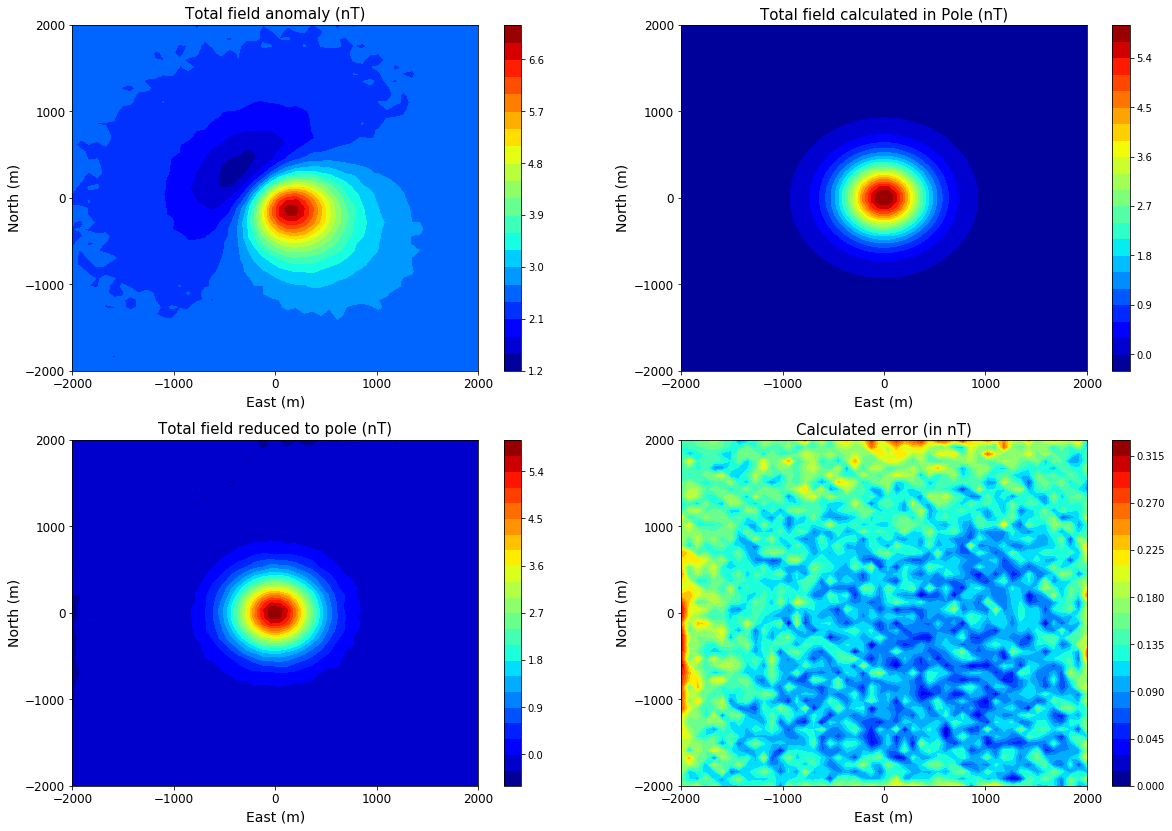

In [27]:
# Plotting all results
plt.close('all')
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.title('Total field anomaly (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), tfa.reshape(shape), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Total field calculated in Pole (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), tfa_pole.reshape(shape), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Total field reduced to pole (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), rtp, 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Calculated error (in nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), (tfa_pole.reshape(shape) - rtp), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

#plt.savefig('figures/reduction-sphere.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [28]:
#Informations about the model - prism
prism = [-400., 400., -550., 550., 200., 400., 1.]
# Inclination and declination (source and field)
incf, decf = 66., -18.
incs, decs = 49., 15.

In [29]:
# Importing total field due to a prism
from codes.prism import prism_tf

In [30]:
# Calculating the total field anomaly
tfp = prism_tf(x, y, z, prism, incf, decf, incs, decs)
tfp_pole = prism_tf(x, y, z, prism, 90., 0., 90., 0.)

In [31]:
_ = analysis(tfp, 'nT')

Minimum:    -51.4537 nT
Maximum:    123.1137 nT
Mean value: 1.6664 nT
Variation:  174.5674 nT


In [32]:
# Adding Gaussian noise 
tfap = addnoise(tfp, 2., 0.15) # 5 percent

In [33]:
# Calculate the reduction to pole
res = reduction(x.reshape(shape), y.reshape(shape), tfap.reshape(shape), incf, decf, incs, decs)

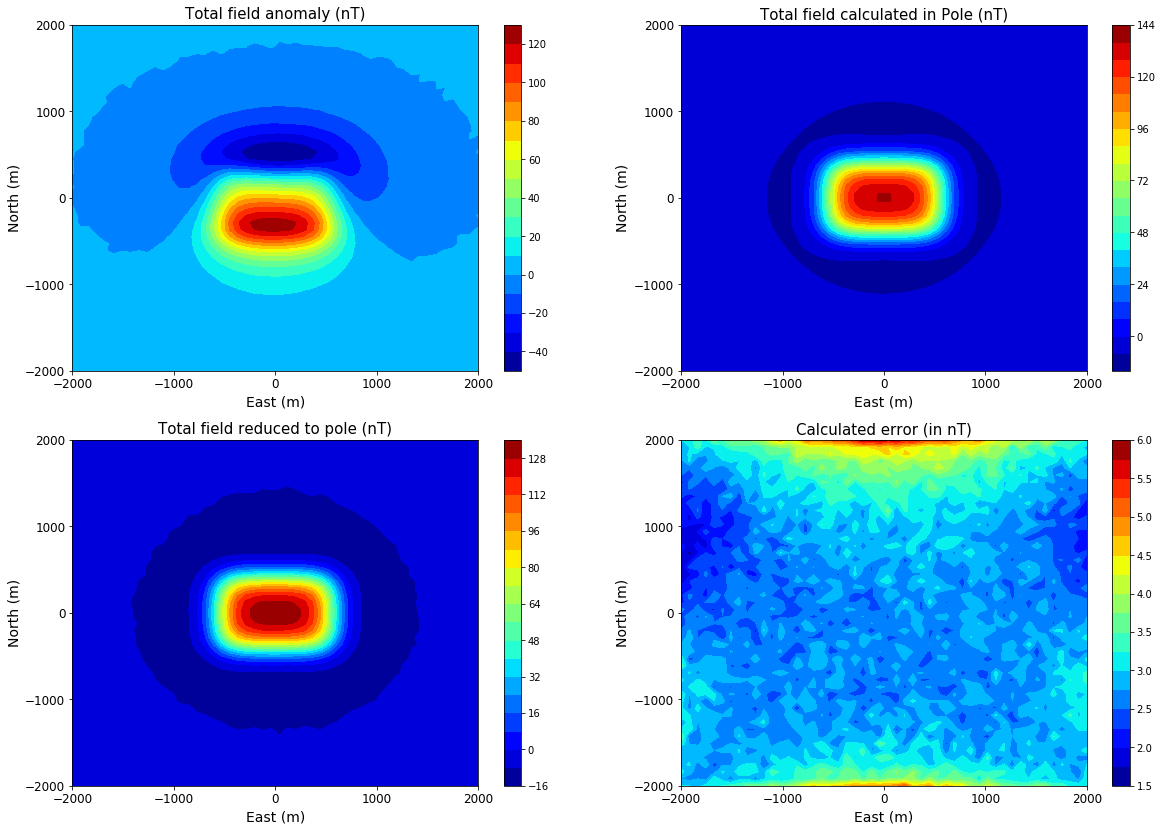

In [35]:
# Plotting all results
plt.close('all')
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.title('Total field anomaly (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), tfap.reshape(shape), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Total field calculated in Pole (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), tfp_pole.reshape(shape), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Total field reduced to pole (nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), res, 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Calculated error (in nT)', fontsize = 15)
plt.contourf(y.reshape(shape), x.reshape(shape), (tfp_pole.reshape(shape) - res), 20, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
plt.colorbar()

plt.savefig('figures/reduction-prism.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()